<a href="https://www.kaggle.com/code/ayeshairshadcoder/pca-on-movies?scriptVersionId=114715844" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/covid19-dataset/Covid Data.csv
/kaggle/input/movies/movies.csv


# Movie Data Set

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy import stats 
import seaborn as sns

In [3]:

covid = pd.read_csv("/kaggle/input/covid19-dataset/Covid Data.csv")

covid.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,...,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,...,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,...,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,...,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,...,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,...,2,2,1,2,2,2,2,2,3,97


In [4]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   USMER                 1048575 non-null  int64 
 1   MEDICAL_UNIT          1048575 non-null  int64 
 2   SEX                   1048575 non-null  int64 
 3   PATIENT_TYPE          1048575 non-null  int64 
 4   DATE_DIED             1048575 non-null  object
 5   INTUBED               1048575 non-null  int64 
 6   PNEUMONIA             1048575 non-null  int64 
 7   AGE                   1048575 non-null  int64 
 8   PREGNANT              1048575 non-null  int64 
 9   DIABETES              1048575 non-null  int64 
 10  COPD                  1048575 non-null  int64 
 11  ASTHMA                1048575 non-null  int64 
 12  INMSUPR               1048575 non-null  int64 
 13  HIPERTENSION          1048575 non-null  int64 
 14  OTHER_DISEASE         1048575 non-null  int64 
 15

In [5]:
covid.describe()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [6]:
#covid.duplicated().sum()

In [7]:
covid_copy=covid.copy()

In [8]:
covid_copy=covid_copy.drop_duplicates()

In [9]:
print(covid_copy.isnull().sum())

USMER                   0
MEDICAL_UNIT            0
SEX                     0
PATIENT_TYPE            0
DATE_DIED               0
INTUBED                 0
PNEUMONIA               0
AGE                     0
PREGNANT                0
DIABETES                0
COPD                    0
ASTHMA                  0
INMSUPR                 0
HIPERTENSION            0
OTHER_DISEASE           0
CARDIOVASCULAR          0
OBESITY                 0
RENAL_CHRONIC           0
TOBACCO                 0
CLASIFFICATION_FINAL    0
ICU                     0
dtype: int64


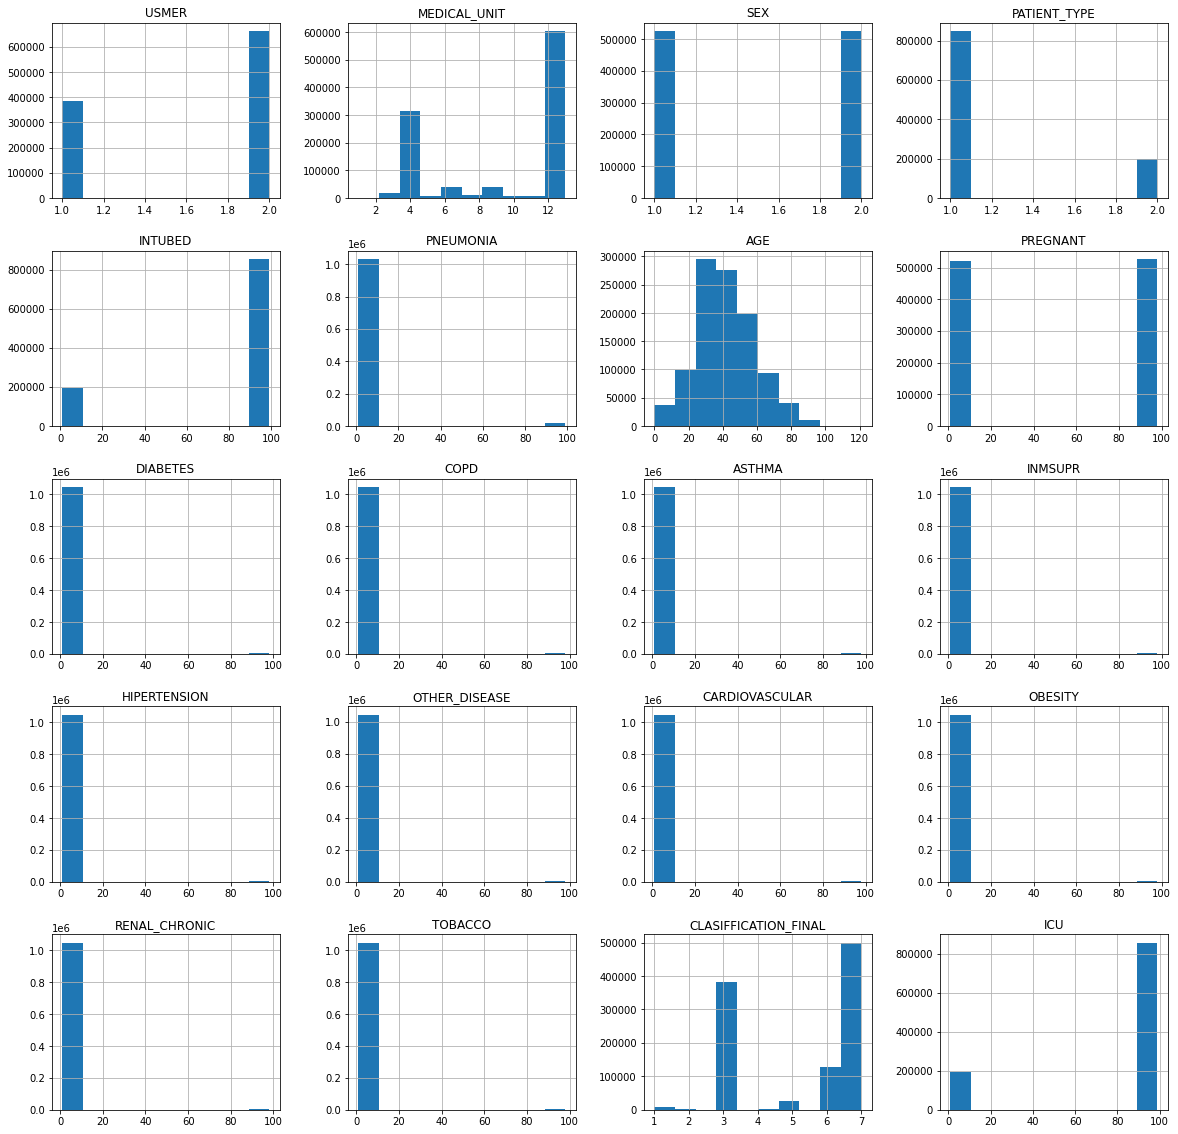

In [10]:
p=covid.hist(figsize=(20,20))

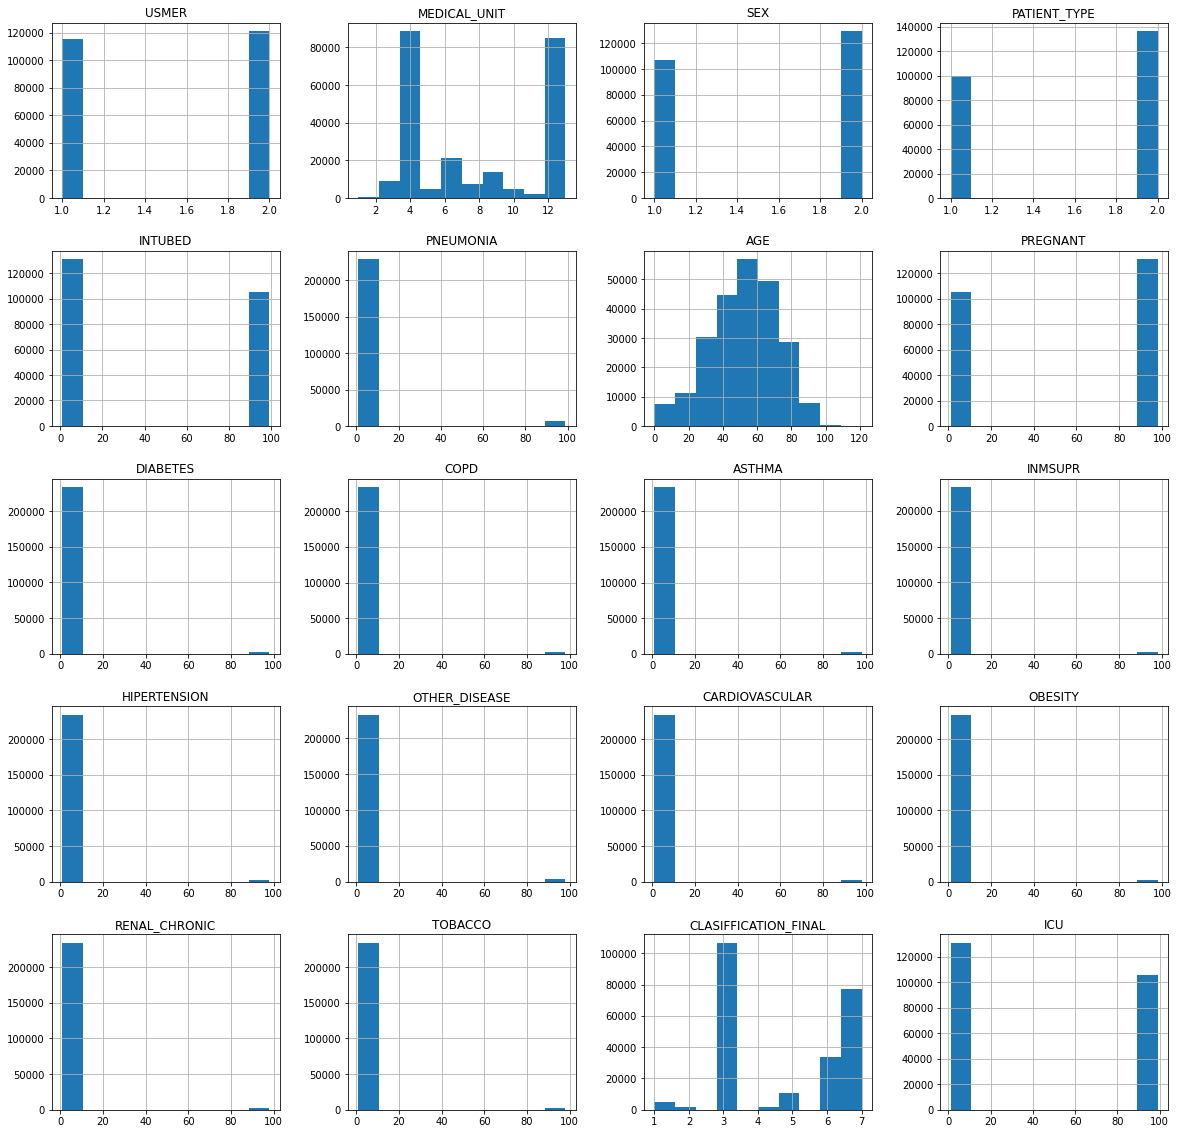

In [11]:
p=covid_copy.hist(figsize=(20,20))

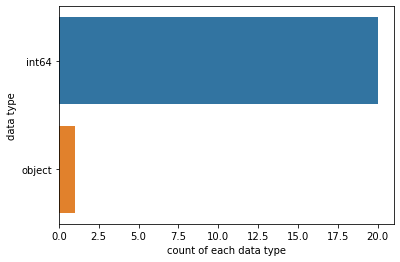

In [12]:
sns.countplot(y=covid.dtypes,data=covid)
plt.xlabel("count of each data type")
plt.ylabel("data type")
plt.show()

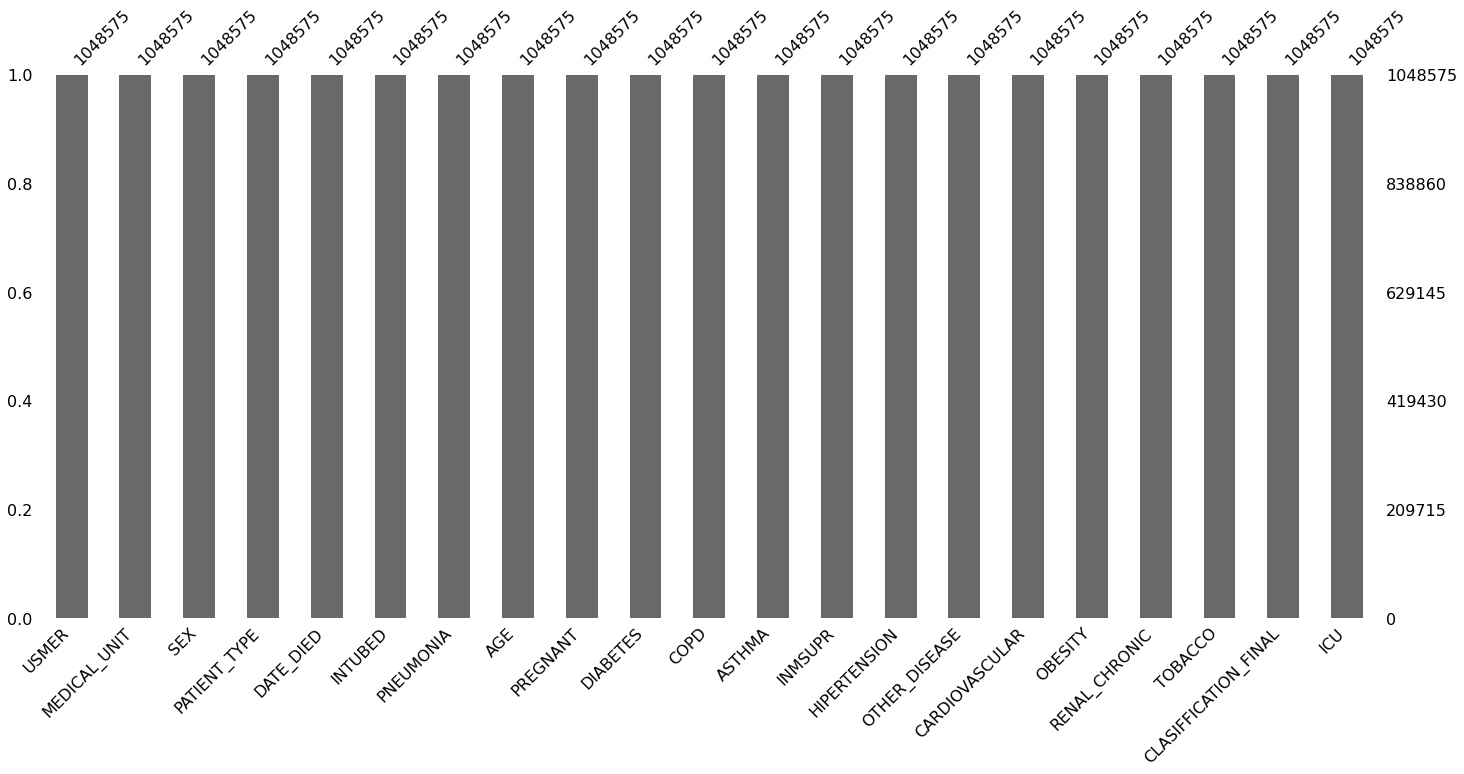

In [13]:
##null count analysis
import missingno as msno
p=msno.bar(covid)

2     115607
97     99882
1      15383
99      5654
Name: ICU, dtype: int64


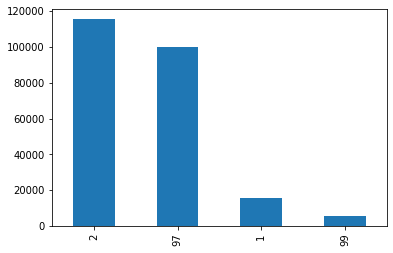

In [14]:
color_wheel={1:"#0392cf",2:"#7bc043"}
colors=covid_copy["ICU"].map(lambda x:color_wheel.get(x+1))
print(covid_copy.ICU.value_counts())
p=covid_copy.ICU.value_counts().plot(kind="bar")

In [15]:
covid_copy.drop(["DATE_DIED"],inplace=True, axis=1)

In [16]:
X_std=StandardScaler().fit_transform(covid_copy)

In [17]:
mean_vec=np.mean(X_std,axis=0)

In [18]:
cov_mat=(X_std-mean_vec).T.dot((X_std-mean_vec)) / (X_std.shape[0]-1)

In [19]:
print(cov_mat)

[[ 1.00000423  0.03354939 -0.00137932 -0.13601815  0.10527161 -0.16777457
  -0.02062457 -0.00184153  0.04546654  0.04166452  0.04124098  0.02711229
   0.04432594 -0.00150554  0.03987953  0.04867165  0.04233104  0.04425779
  -0.01161911  0.103673  ]
 [ 0.03354939  1.00000423 -0.00482733 -0.1086629   0.11715762 -0.0063556
  -0.07674623  0.00792319  0.07094869  0.06368079  0.06145597  0.06161653
   0.07008181  0.0995928   0.06450606  0.07301474  0.06425307  0.0630971
   0.00575604  0.11706996]
 [-0.00137932 -0.00482733  1.00000423  0.09786215 -0.09958615 -0.03627786
   0.03562758  0.98309097  0.00699867  0.0070942   0.0075613   0.00317594
   0.00807496  0.00365435  0.00440744  0.00691087  0.00482621  0.00422422
  -0.06183755 -0.09933545]
 [-0.13601815 -0.1086629   0.09786215  1.00000423 -0.9517985  -0.04910358
   0.23460256  0.08579694 -0.0399921  -0.03415372 -0.02896075 -0.03226797
  -0.03726146 -0.03156071 -0.02975959 -0.02787109 -0.03416201 -0.03403088
  -0.14897078 -0.95054198]
 [ 0.1

In [20]:
cov_mat=np.cov(X_std.T)

In [21]:
eignValue, eigenVector =np.linalg.eig(cov_mat)

In [22]:
print(eignValue)

[8.08145794e+00 3.18385370e+00 1.93685819e+00 1.23770675e+00
 9.51077326e-01 9.93485110e-01 8.60774714e-01 7.64307118e-01
 4.63806360e-01 3.09570180e-01 1.37508452e-03 1.66562076e-02
 4.52443528e-02 2.42620370e-01 2.17514695e-01 1.01381034e-01
 1.05547699e-01 1.44514037e-01 1.73132792e-01 1.69200897e-01]


In [23]:
print(eigenVector)

[[-1.81571338e-02  7.46455456e-02 -3.90536481e-02  5.93438882e-01
  -5.18334530e-01  9.14742300e-03  1.83169830e-01 -5.75412482e-01
   8.25474024e-02 -1.03024853e-02 -1.14987940e-03  6.84104388e-04
  -6.33371410e-04 -8.03422436e-03 -3.04123067e-03 -7.33105603e-04
  -6.60978823e-04 -6.87339369e-04 -7.23854576e-04 -4.69303843e-04]
 [-3.17720627e-02  8.85613867e-02 -4.47972804e-02  1.19729796e-01
   2.91697678e-01 -8.74855335e-01  3.40858970e-01 -3.92521364e-02
  -7.30322887e-02  5.18926021e-03 -1.78063661e-04 -7.88527267e-03
   9.96280229e-03 -3.10151367e-02 -1.01470606e-02  4.72135975e-04
   7.29462343e-04 -5.45144791e-03 -5.25283096e-04  1.63587066e-03]
 [-2.46727500e-03 -1.45076110e-01 -6.89980119e-01 -3.44729809e-02
  -2.11465578e-02  1.86660506e-02  1.09597983e-02  1.48661479e-02
   2.49274234e-03  1.48523477e-03 -4.98900305e-04 -7.07439935e-01
  -7.48489935e-03 -6.71751049e-04  2.74788108e-03 -7.96764456e-04
  -7.89331245e-05 -2.07576251e-03 -1.22054594e-04  4.95141009e-04]
 [ 2.12

In [24]:
eig_pairs=[(np.abs(eignValue[i]),eigenVector[:,i]) for i in range(len(eignValue))]

In [25]:
from sklearn.decomposition import PCA

In [26]:
pca=PCA(n_components=20)
pca.fit_transform(covid_copy)

array([[ 7.86293210e+01,  4.39328927e+01, -3.99883261e+00, ...,
        -4.01715917e-01, -1.48945170e-02,  9.00933331e-03],
       [ 6.69830034e+01, -5.03324400e+01, -6.68633523e+00, ...,
        -4.02377909e-01, -1.95570214e-02, -7.65779330e-03],
       [-6.52191034e+01, -3.47347457e+01, -3.21531022e+00, ...,
        -5.53801451e-01, -2.37981366e-03,  9.26318838e-04],
       ...,
       [-6.41278601e+01, -3.48666407e+01, -3.07118178e+00, ...,
         4.74657761e-01, -5.73689356e-03, -1.96537526e-02],
       [ 6.83983378e+01, -5.04991706e+01, -5.46742374e+00, ...,
        -3.80895437e-01, -2.90470791e-02, -2.86693029e-02],
       [ 6.86202039e+01, -5.05196190e+01, -5.43134106e+00, ...,
        -3.80561633e-01, -2.78069302e-02, -2.90658427e-02]])

In [27]:
pca=PCA().fit(X_std)

In [28]:
print(pca.explained_variance_ratio_)

[4.04071189e-01 1.59192012e-01 9.68425002e-02 6.18850756e-02
 4.96740455e-02 4.75536653e-02 4.30385538e-02 3.82151943e-02
 2.31902200e-02 1.54784436e-02 1.21309672e-02 1.08756888e-02
 8.65660300e-03 8.46000906e-03 7.22567128e-03 5.27736265e-03
 5.06903027e-03 2.26220808e-03 8.32806860e-04 6.87539352e-05]


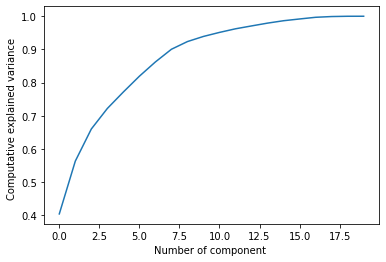

In [29]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of component ")
plt.ylabel("Computative explained variance  ")
plt.show()

In [30]:
print(pca.explained_variance_ratio_)

[4.04071189e-01 1.59192012e-01 9.68425002e-02 6.18850756e-02
 4.96740455e-02 4.75536653e-02 4.30385538e-02 3.82151943e-02
 2.31902200e-02 1.54784436e-02 1.21309672e-02 1.08756888e-02
 8.65660300e-03 8.46000906e-03 7.22567128e-03 5.27736265e-03
 5.06903027e-03 2.26220808e-03 8.32806860e-04 6.87539352e-05]
